In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os 
import sys
sns.set_theme()

In [2]:
base_path = 'data'
gru_base_path = os.path.join(base_path, 'gru', 'gru_') 
lstm_base_path = os.path.join(base_path, 'lstm', 'lstm_') 
baseline_path = os.path.join(base_path, 'baseline.csv')
variations = ['4', '8', '16', '8_R', '16_R']
gru_data_paths = [baseline_path] + [gru_base_path+variation+'.csv' for variation in variations]
lstm_data_paths = [baseline_path] + [lstm_base_path+variation+'.csv' for variation in variations] 
all_paths = gru_data_paths + lstm_data_paths
for path in all_paths:
    if os.path.exists(path):
        print(path, 'EXISTS')
    else:
        print(path, 'NOT EXISTS')

data\baseline.csv EXISTS
data\gru\gru_4.csv EXISTS
data\gru\gru_8.csv EXISTS
data\gru\gru_16.csv EXISTS
data\gru\gru_8_R.csv EXISTS
data\gru\gru_16_R.csv EXISTS
data\baseline.csv EXISTS
data\lstm\lstm_4.csv EXISTS
data\lstm\lstm_8.csv EXISTS
data\lstm\lstm_16.csv EXISTS
data\lstm\lstm_8_R.csv EXISTS
data\lstm\lstm_16_R.csv EXISTS


In [3]:
def compute_emas(reward_df, n=10, alpha=.05):
    reward_df['Frames'] = 950
    reward_df['Frames accum.'] = reward_df['Frames'].cumsum()
    reward_df[f'Running_{n}'] = reward_df['Step'] // n
    reward_std = reward_df['Value'].rolling(n).std()
    reward_df[f'mean_{n}'] = reward_df['Value'].rolling(n).mean()
    reward_df['lower_std'] = reward_df[f'mean_{n}'] - reward_std
    reward_df['upper_std'] = reward_df[f'mean_{n}'] + reward_std
    reward_df['Wall time'] = pd.to_datetime(reward_df['Wall time'], unit='s')
    reward_df['Relative time'] = reward_df['Wall time'] - reward_df['Wall time'][0]
    reward_df['Value_ema'] = reward_df['Value'].ewm(alpha=alpha).mean()
def read_and_process_dfs(paths, alpha=0.05):
    dfs = []
    for path in paths:
        if os.path.exists(path):
            df = pd.read_csv(path)
            compute_emas(df, alpha=alpha)
            dfs.append([path.split('\\')[-1][:-4], df])
        else:
            print(path, "NOT EXISTS")
    return dfs

In [4]:
def plot_model_training(dfs, title, add_time=True):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.set_title(title, fontdict={'fontsize':16})
    ax.set_ylabel('Reward', fontdict={'fontsize':12})
    ax.set_xlabel('Frames', fontdict={'fontsize':12})
    ax.set_xlim(xmin=0,xmax=3e6)
    # ax.fill_between(reward_df['Frames accum.'], reward_df['lower_std'], reward_df['upper_std'], alpha=.3, color=line_color) # label='std of reward'
    for model_name, reward_df in dfs:
        sns.lineplot(x=reward_df['Frames accum.'], y=reward_df['Value_ema'], label=model_name)
    # ax.plot(reward_df['Value_ema'], color=line_color, label=f'Reward EMA (alpha={alpha})')
    if add_time:
        new_ticks = []
        for x in ax.get_xticks().tolist():
            txt = int(x)
            if x >= 0:
                nearest_idx = min(reward_df['Frames accum.'].searchsorted(x), len(reward_df)-1)
                hours = reward_df['Relative time'].iloc[nearest_idx].total_seconds()/3600
                txt = f'{txt:.0e}' + '\n' + f"{hours:.1f}" + ' hours\n'
            new_ticks.append(txt)
        ax.set_xticks(ax.get_xticks().tolist())
        ax.set_xticklabels(new_ticks)
    ax.legend()
    plt.show()

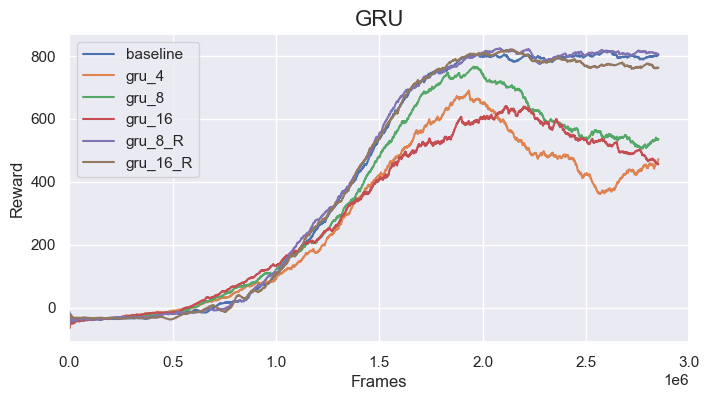

In [5]:
alpha = 0.01
gru_dfs = read_and_process_dfs(gru_data_paths, alpha=alpha)
plot_model_training(gru_dfs, 'GRU', add_time=False)

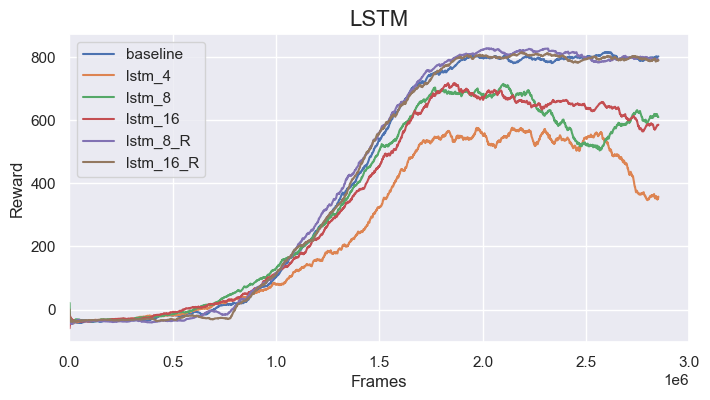

In [6]:
alpha = 0.01
gru_dfs = read_and_process_dfs(lstm_data_paths, alpha=alpha)
plot_model_training(gru_dfs, 'LSTM', add_time=False)

In [7]:
base_path = '..\\models\\DriveDQN_simple_fusion2_'
gru_base_path = base_path+'gru_' 
lstm_base_path = base_path+ 'lstm_' 
baseline_path = '..\\models\\' + 'DriveDQN_cnn_1f_Falseres'
variations = ['4f_Falseres', '8f_Falseres', '16f_Falseres', '8f_Trueres', '16f_Trueres']
gru_data_paths =  [gru_base_path+variation for variation in variations]
lstm_data_paths =  [lstm_base_path+variation for variation in variations] 
all_paths = [baseline_path] + gru_data_paths + lstm_data_paths
models = {}
models_to_run = {}
for path in all_paths:
    if os.path.exists(path):
        print(path, 'EXISTS')
        model_name = path.split('\\')[-1]
        models[model_name] = path
        models_to_run[model_name] = [True, []]
    else:
        print(path, 'NOT EXISTS')

..\models\DriveDQN_cnn_1f_Falseres EXISTS
..\models\DriveDQN_simple_fusion2_gru_4f_Falseres EXISTS
..\models\DriveDQN_simple_fusion2_gru_8f_Falseres EXISTS
..\models\DriveDQN_simple_fusion2_gru_16f_Falseres EXISTS
..\models\DriveDQN_simple_fusion2_gru_8f_Trueres EXISTS
..\models\DriveDQN_simple_fusion2_gru_16f_Trueres EXISTS
..\models\DriveDQN_simple_fusion2_lstm_4f_Falseres EXISTS
..\models\DriveDQN_simple_fusion2_lstm_8f_Falseres EXISTS
..\models\DriveDQN_simple_fusion2_lstm_16f_Falseres EXISTS
..\models\DriveDQN_simple_fusion2_lstm_8f_Trueres EXISTS
..\models\DriveDQN_simple_fusion2_lstm_16f_Trueres EXISTS


In [8]:
models, models_to_run

({'DriveDQN_cnn_1f_Falseres': '..\\models\\DriveDQN_cnn_1f_Falseres',
  'DriveDQN_simple_fusion2_gru_4f_Falseres': '..\\models\\DriveDQN_simple_fusion2_gru_4f_Falseres',
  'DriveDQN_simple_fusion2_gru_8f_Falseres': '..\\models\\DriveDQN_simple_fusion2_gru_8f_Falseres',
  'DriveDQN_simple_fusion2_gru_16f_Falseres': '..\\models\\DriveDQN_simple_fusion2_gru_16f_Falseres',
  'DriveDQN_simple_fusion2_gru_8f_Trueres': '..\\models\\DriveDQN_simple_fusion2_gru_8f_Trueres',
  'DriveDQN_simple_fusion2_gru_16f_Trueres': '..\\models\\DriveDQN_simple_fusion2_gru_16f_Trueres',
  'DriveDQN_simple_fusion2_lstm_4f_Falseres': '..\\models\\DriveDQN_simple_fusion2_lstm_4f_Falseres',
  'DriveDQN_simple_fusion2_lstm_8f_Falseres': '..\\models\\DriveDQN_simple_fusion2_lstm_8f_Falseres',
  'DriveDQN_simple_fusion2_lstm_16f_Falseres': '..\\models\\DriveDQN_simple_fusion2_lstm_16f_Falseres',
  'DriveDQN_simple_fusion2_lstm_8f_Trueres': '..\\models\\DriveDQN_simple_fusion2_lstm_8f_Trueres',
  'DriveDQN_simple_fus

In [10]:
needs_to_run = {'DriveDQN_cnn_1f_Falseres': [True, None],
                'DriveDQN_simple_fusion2_gru_4f_Falseres': [True, [1900, 2000, 2100, 2900]],
                'DriveDQN_simple_fusion2_gru_8f_Falseres': [True, [1900, 2000, 2100, 2900]],
                'DriveDQN_simple_fusion2_gru_16f_Falseres': [True, [2000, 2100, 2200, 2900]],
                'DriveDQN_simple_fusion2_gru_8f_Trueres': [True, [2700, 2800, 2900]],
                'DriveDQN_simple_fusion2_gru_16f_Trueres': [True, [2700, 2800, 2900]],
                'DriveDQN_simple_fusion2_lstm_4f_Falseres': [True, [2200,2300,2400, 2900]],
                'DriveDQN_simple_fusion2_lstm_8f_Falseres': [True, [1900, 2000, 2100, 2900]],
                'DriveDQN_simple_fusion2_lstm_16f_Falseres': [True, [1800, 1900, 2000, 2900]],
                'DriveDQN_simple_fusion2_lstm_16f_Trueres': [True, [2700, 2800, 2900]],
                'DriveDQN_simple_fusion2_lstm_8f_Trueres': [True, [2700, 2800, 2900]]}
needs_to_run, len(needs_to_run.keys())

({'DriveDQN_cnn_1f_Falseres': [True, None],
  'DriveDQN_simple_fusion2_gru_4f_Falseres': [True, [1900, 2000, 2100, 2900]],
  'DriveDQN_simple_fusion2_gru_8f_Falseres': [True, [1900, 2000, 2100, 2900]],
  'DriveDQN_simple_fusion2_gru_16f_Falseres': [True, [2000, 2100, 2200, 2900]],
  'DriveDQN_simple_fusion2_gru_8f_Trueres': [True, [2700, 2800, 2900]],
  'DriveDQN_simple_fusion2_gru_16f_Trueres': [True, [2700, 2800, 2900]],
  'DriveDQN_simple_fusion2_lstm_4f_Falseres': [True, [2200, 2300, 2400, 2900]],
  'DriveDQN_simple_fusion2_lstm_8f_Falseres': [True, [1900, 2000, 2100, 2900]],
  'DriveDQN_simple_fusion2_lstm_16f_Falseres': [True,
   [1800, 1900, 2000, 2900]],
  'DriveDQN_simple_fusion2_lstm_16f_Trueres': [True, [2700, 2800, 2900]],
  'DriveDQN_simple_fusion2_lstm_8f_Trueres': [True, [2700, 2800, 2900]]},
 11)

In [37]:
for model_name, spec in needs_to_run.items():
    if model_name in ['DriveDQN_simple_fusion2_gru_16f_Trueres', 'DriveDQN_simple_fusion2_gru_16f_Falseres']:
        should_run, model_ids = spec 
        if should_run:
            print("Evaluating model: ", model_name)
            checkpoints = get_checkpoints(model_name, model_ids)
            print(checkpoints)
        else: 
            print("Skipping model: ", model_name)
    else:
        print("Skipping model: ", model_name)

Skipping model:  DriveDQN_cnn_1f_Falseres
Skipping model:  DriveDQN_simple_fusion2_gru_4f_Falseres
Skipping model:  DriveDQN_simple_fusion2_gru_8f_Falseres
Evaluating model:  DriveDQN_simple_fusion2_gru_16f_Falseres
['models\\DriveDQN_simple_fusion2_gru_16f_Falseres\\DriveDQN_simple_fusion2_gru_16f_Falseres_str(2000).pt', 'models\\DriveDQN_simple_fusion2_gru_16f_Falseres\\DriveDQN_simple_fusion2_gru_16f_Falseres_str(2100).pt', 'models\\DriveDQN_simple_fusion2_gru_16f_Falseres\\DriveDQN_simple_fusion2_gru_16f_Falseres_str(2200).pt']
Skipping model:  DriveDQN_simple_fusion2_gru_8f_Trueres
Evaluating model:  DriveDQN_simple_fusion2_gru_16f_Trueres
['models\\DriveDQN_simple_fusion2_gru_16f_Trueres\\DriveDQN_simple_fusion2_gru_16f_Trueres_str(2900).pt']
Skipping model:  DriveDQN_simple_fusion2_lstm_4f_Falseres
Skipping model:  DriveDQN_simple_fusion2_lstm_8f_Falseres
Skipping model:  DriveDQN_simple_fusion2_lstm_16f_Falseres
Skipping model:  DriveDQN_simple_fusion2_lstm_8f_Trueres


In [36]:
def get_checkpoints(model_name, model_ids):
    checkpoints = []
    if model_ids:
        for idx in model_ids:
            file_name = model_name + f'_str({idx}).pt'
            model_path = os.path.join('models', model_name, file_name)
            checkpoints.append(model_path)
    else:
        checkpoints.append(os.path.join('models', model_name, model_name+'.pt'))
    return checkpoints

In [43]:
n_frames = int('DriveDQN_simple_fusion2_gru_44f_Falseres'.split('_')[-2][:-1])
n_frames

44

In [48]:
'DriveDQN_simple_fusion2_gru_44f_Trueres'.split('_')[-1][0] == 'T'

True

In [52]:
means, stds, midxs = [1,2,3,4,5,6], [6,4,5,3,2,1], [None,1,4,2,3,5]

In [54]:
with open('stats.txt', 'w') as fp:
    fp.write('model_id,mean reward,std\n')
    for i in range(len(means)):
        fp.write(f'{str(midxs[i])},{str(means[i])},{str(stds[i])}\n')   

In [62]:
'_'.join('DriveDQN_simple_fusion2_gru_16f_Trueres'.split('_')[:-2])

'DriveDQN_simple_fusion2_gru'